# ASSOCIATION ANALYSIS WITH FP-GROWTH

**File:** FPGrowth.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# INSTALL AND IMPORT PACKAGES
The Python package `mlxtend` contains the implementation of the FP-growth algorithm, which can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [ ]:
# pip install mlxtend

If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [ ]:
# import sys
# !{sys.executable} -m pip install mlxtend

Once `mlxtend` is installed, then load the packages below.

In [1]:
import pandas as pd                                   # For dataframes
import matplotlib.pyplot as plt                       # For plotting data
from mlxtend.preprocessing import TransactionEncoder  # For FP-tree algorithm
from mlxtend.frequent_patterns import fpgrowth        # For FP-tree algorithm

# LOAD AND PREPARE DATA
For this demonstration, we'll use the dataset `Groceries.csv`, which comes from the R package `arules` and is saved as a CSV file. The data is in transactional format (as opposed to tabular format), which means that each row is a list of items purchased together and that the items may be in different order. There are 32 columns in each row, each column either contains a purchased items or NaN.

## Import Data

- To read read the dataset from a local CSV file, run the following cell.

In [2]:
transactions = []

with open('data/Groceries.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)
    
transactions[:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

# APPLY FP-GROWTH

## Prepare Data

- Create a "wide" dataframe where each column corresponds to a single good.

In [3]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Build Rules

- Call `fpgrowth()` on `transactions`. 
- As parameters `fpgrowth()` can take the minimum support ratio and minimum confidence. 
- Only the pairs of items that satisfy these criteria would be returned.

In [4]:
rules_df = fpgrowth(df, min_support=0.01, use_colnames=True, max_len=2, verbose=False)

rules_df = rules_df[rules_df.itemsets.map(len) == 2]
rules_df['From'] = rules_df['itemsets'].map(lambda x: list(x)[0])
rules_df['To'] = rules_df['itemsets'].map(lambda x: list(x)[1])
rules_df['N'] = (rules_df['support'] * len(transactions)).astype(int)

rules_df.sort_values('N', ascending=False, inplace=True)

rules_df.head()

,support,itemsets,From,To,N
132,0.074835,"(other vegetables, whole milk)",other vegetables,whole milk,736
142,0.056634,"(rolls/buns, whole milk)",rolls/buns,whole milk,557
104,0.056024,"(yogurt, whole milk)",yogurt,whole milk,551
219,0.048907,"(whole milk, root vegetables)",whole milk,root vegetables,481
217,0.047382,"(other vegetables, root vegetables)",other vegetables,root vegetables,466


## List Rules with N's
- The code below calls `plot()` on each row of the rules DataFrame to create a list of all the mined rules. 
- First, we have to add two numeric columns corresponding to each item to `rules_df`.

In [5]:
# Pick top rules
rules_df = rules_df.sort_values('N', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20)

,support,itemsets,From,To,N,FromN,ToN
132,0.074835,"(other vegetables, whole milk)",other vegetables,whole milk,736,5,9
142,0.056634,"(rolls/buns, whole milk)",rolls/buns,whole milk,557,12,9
104,0.056024,"(yogurt, whole milk)",yogurt,whole milk,551,15,9
219,0.048907,"(whole milk, root vegetables)",whole milk,root vegetables,481,9,1
217,0.047382,"(other vegetables, root vegetables)",other vegetables,root vegetables,466,5,1
107,0.043416,"(yogurt, other vegetables)",yogurt,other vegetables,427,15,5
141,0.042603,"(other vegetables, rolls/buns)",other vegetables,rolls/buns,419,5,12
111,0.042298,"(tropical fruit, whole milk)",tropical fruit,whole milk,416,20,9
173,0.040061,"(soda, whole milk)",soda,whole milk,394,14,9
172,0.038332,"(soda, rolls/buns)",soda,rolls/buns,377,14,12


## Plot Rules
Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 10 (support*10).

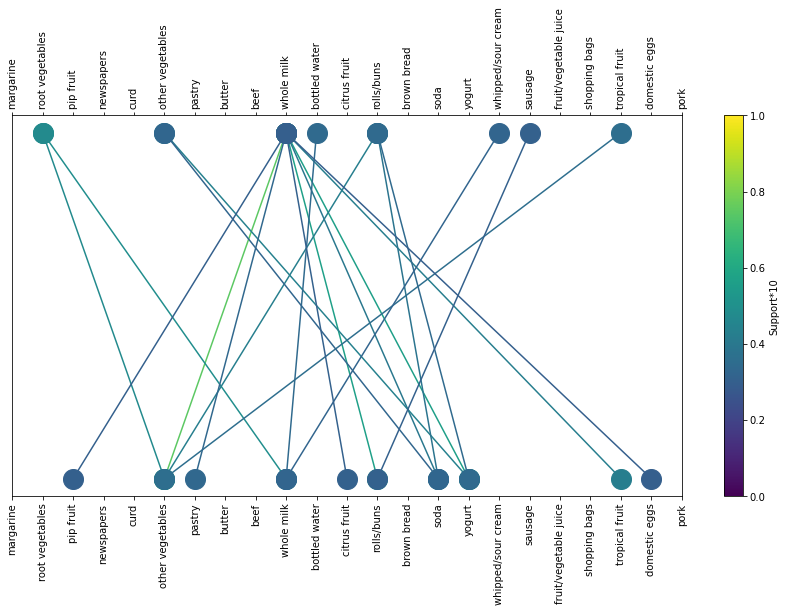

In [6]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['support'] * 10),
             markersize=20)

# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.